In [2]:
import pandas as pd

In [3]:
dfAll = pd.read_csv('one piece arcs.csv')
dfAll.head()

,Arc Name,Arc Type,Total Chapters,Manga Percentage,Total Episodes,Total Minutes,Anime Percentage
0,Romance Dawn Arc,Canon,7,0.0067,3,72,0.0028
1,Orange Town Arc,Canon,14,0.0133,5,120,0.0046
2,Syrup Village Arc,Canon,20,0.0191,10,240,0.0093
3,Baratie Arc,Canon,27,0.0257,12,288,0.0112
4,Arlong Park Arc,Canon,27,0.0257,14,360,0.0130


Предметная область - мультипликация, анимация, статистика
<br>
Источник данных - kaggle (https://www.kaggle.com/datasets/dinishsubaramaniam/op-episodes-and-arcs?select=one+piece+arcs.csv)
<br>
Характер данных - реальный

Строковые атрибуты:
<br>
-Arc Name - Название арки
<br>
-Arc Type - Канон или филлер


Числовые атрибуты:
<br>
-Total Chapters - Общее количество нарисованных глав в томе манги
<br>
-Manga Percentage - Общий вклад этой конкретной арки в мангу "One Piece"
<br>
-Total Episodes - Общее количество серий, анимированных Toei Animation
<br>
-Total Minutes - Общее количество минут эпизодов в арке
<br>
-Anime Percentage - Общий вклад этой конкретной арки в аниме "One Piece"

Нет описания задачи анализа

In [4]:
print(dfAll.isnull().sum())

Arc Name            0
Arc Type            0
Total Chapters      0
Manga Percentage    0
Total Episodes      0
Total Minutes       0
Anime Percentage    0
dtype: int64


Нет пропущенных значений
<br>
Для обработки пропущенных значений можно использовать функцию dropna(), которая удаляет строки, содержащие хотя бы одно пропущенное значение

Убираем из рассмотрения нечисловые атрибуты

In [5]:
df=dfAll.drop(columns = ['Arc Name','Arc Type'],axis = 1)

Находим средние значения для всех числовых атрибутов

In [6]:
df.mean()

Total Chapters       19.072727
Manga Percentage      0.018182
Total Episodes       19.563636
Total Minutes       453.381818
Anime Percentage      0.018185
dtype: float64

Находим СКО для всех числовых атрибутов

In [7]:
df.std()

Total Chapters       28.784547
Manga Percentage      0.027500
Total Episodes       31.756460
Total Minutes       573.134962
Anime Percentage      0.029514
dtype: float64

Строим гистограммы для всех числовых атрибутов

array([[<Axes: title={'center': 'Total Chapters'}>,
        <Axes: title={'center': 'Manga Percentage'}>],
       [<Axes: title={'center': 'Total Episodes'}>,
        <Axes: title={'center': 'Total Minutes'}>],
       [<Axes: title={'center': 'Anime Percentage'}>, <Axes: >]],
      dtype=object)

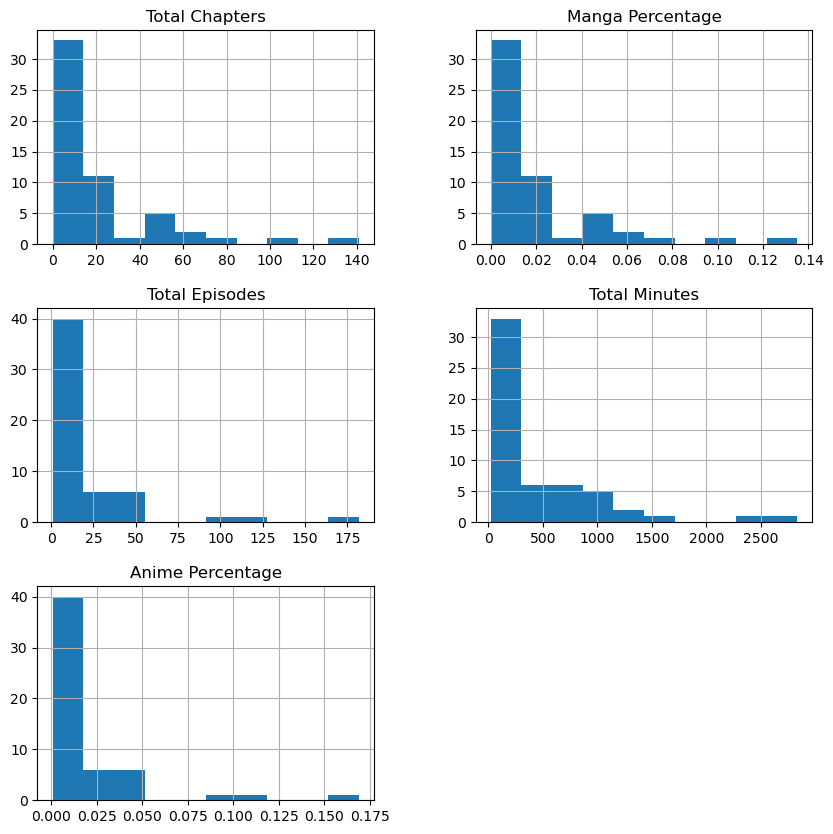

In [8]:
df.hist(figsize=(10,10))

Для всех числовых атрибутов строим BoxPlot'ы для определения выбросов

<Axes: >

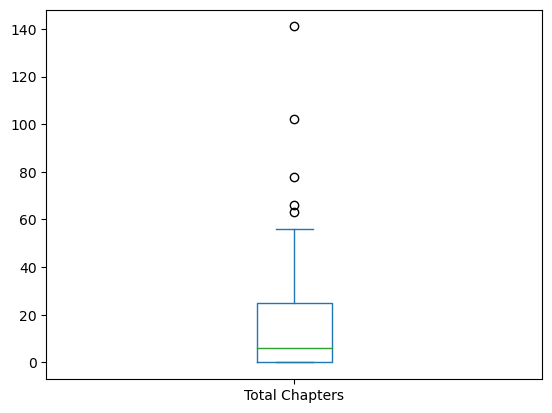

In [9]:
df['Total Chapters'].plot.box()

<Axes: >

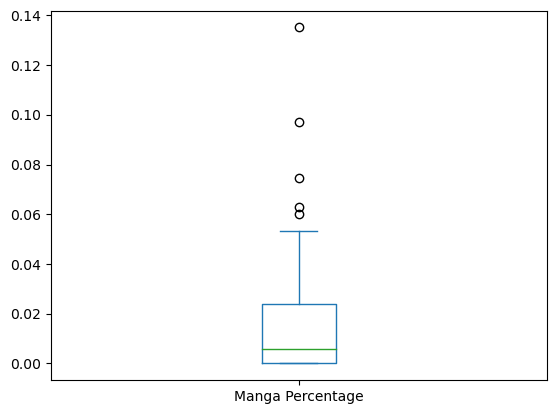

In [10]:
df['Manga Percentage'].plot.box()

<Axes: >

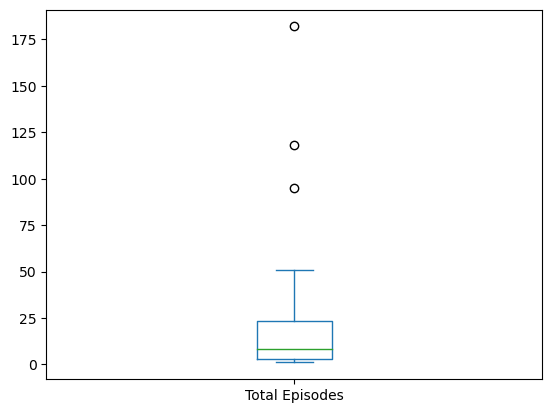

In [11]:
df['Total Episodes'].plot.box()

<Axes: >

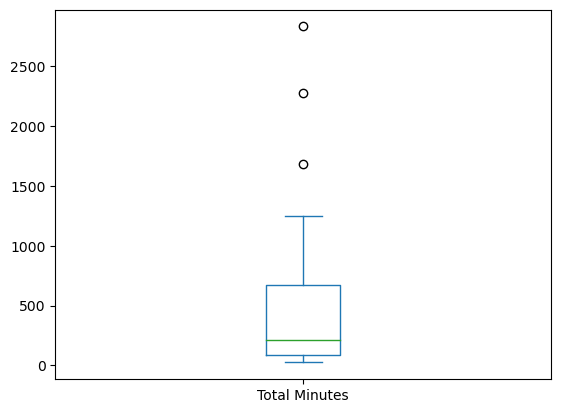

In [12]:
df['Total Minutes'].plot.box()

<Axes: >

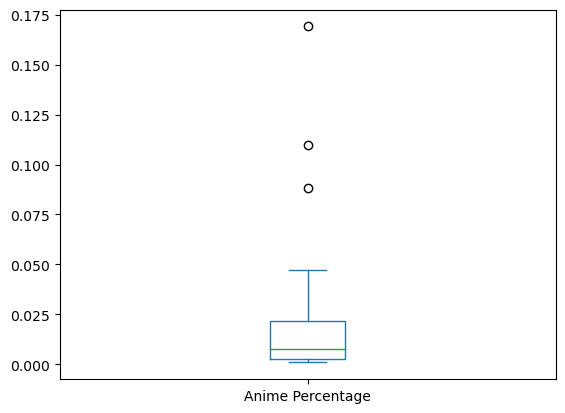

In [13]:
df['Anime Percentage'].plot.box()

Из BoxPlot'ов видно, что выбросы присутствую в каждом столбце (так как есть значения вне "усов")

Строим матрицу корреляции

In [14]:
df.corr()

,Total Chapters,Manga Percentage,Total Episodes,Total Minutes,Anime Percentage
Total Chapters,1.000000,0.999994,0.950601,0.867918,0.950651
Manga Percentage,0.999994,1.000000,0.951158,0.867367,0.951207
Total Episodes,0.950601,0.951158,1.000000,0.861659,0.999999
Total Minutes,0.867918,0.867367,0.861659,1.000000,0.861876
Anime Percentage,0.950651,0.951207,0.999999,0.861876,1.000000


Из матрицы корреляции видно, что все параметры высококоррелированны между собой (так как значения близки к 1)
<br>
Характер корреляции для всех параметров - положительный

Строим матрицу графиков рассеивания

array([[<Axes: xlabel='Total Chapters', ylabel='Total Chapters'>,
        <Axes: xlabel='Manga Percentage', ylabel='Total Chapters'>,
        <Axes: xlabel='Total Episodes', ylabel='Total Chapters'>,
        <Axes: xlabel='Total Minutes', ylabel='Total Chapters'>,
        <Axes: xlabel='Anime Percentage', ylabel='Total Chapters'>],
       [<Axes: xlabel='Total Chapters', ylabel='Manga Percentage'>,
        <Axes: xlabel='Manga Percentage', ylabel='Manga Percentage'>,
        <Axes: xlabel='Total Episodes', ylabel='Manga Percentage'>,
        <Axes: xlabel='Total Minutes', ylabel='Manga Percentage'>,
        <Axes: xlabel='Anime Percentage', ylabel='Manga Percentage'>],
       [<Axes: xlabel='Total Chapters', ylabel='Total Episodes'>,
        <Axes: xlabel='Manga Percentage', ylabel='Total Episodes'>,
        <Axes: xlabel='Total Episodes', ylabel='Total Episodes'>,
        <Axes: xlabel='Total Minutes', ylabel='Total Episodes'>,
        <Axes: xlabel='Anime Percentage', ylabel='Total E

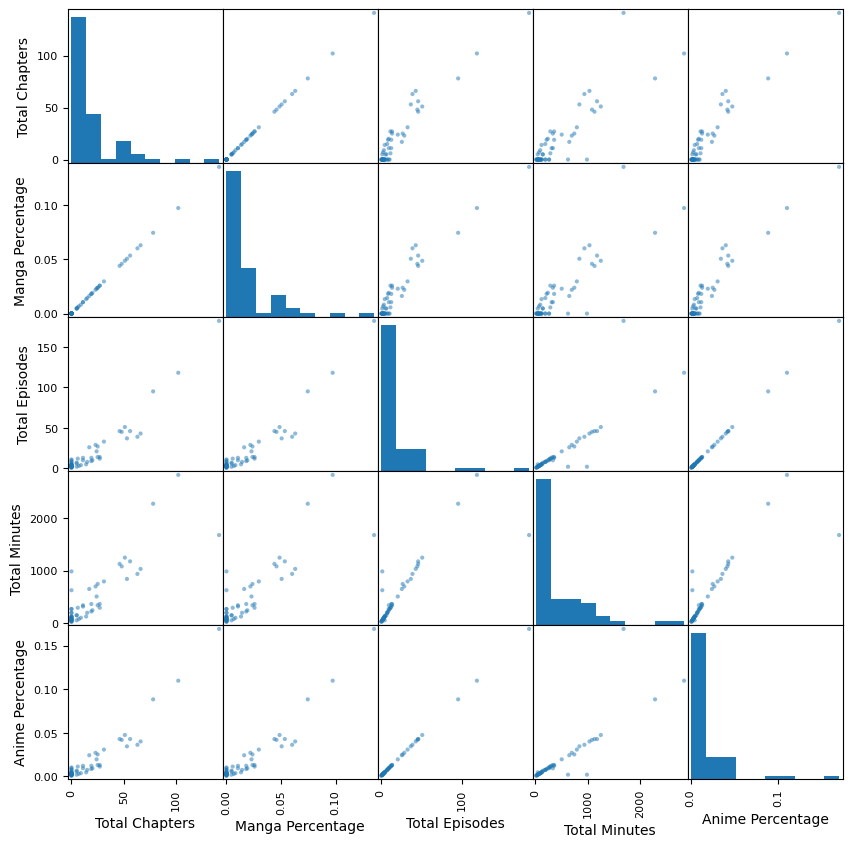

In [15]:
pd.plotting.scatter_matrix(df, figsize=(10,10))

Из матрицы графиков рассеивания видно, что все атрибуты имеют положительный характер корреляции, а так же они высококоррелированы, как мы и наблюдали в матрице корреляции. 
<br>
По виду графиков рассеивания можно сделать вывод о том, что у атрибутов прослеживается линейная зависимость. 
<br>
На многих графиках можно наблюдать точки, которые находятся отдельно от основного скопления точек. Это выбросы.